In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [35]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

from sklearn.model_selection import train_test_split

In [36]:
pd.set_option('display.float_format', lambda x: f'{x:.0f}')
# formating floating points value to display decimal points and forcing pandas to not show in scientific notation

In [37]:
df = pd.read_csv('./dataset/transformed_dataset.csv')

In [38]:
df.head(10)

,Unnamed: 0,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,...,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,0,1,1,3012023,3,1,2023,1100,2023000001,2023000001,...,0,1,0,1,2,2,2,1,1,9
1,1,1,1,1062023,1,6,2023,1100,2023000002,2023000002,...,0,1,0,1,1,1,2,1,1,9
2,2,1,1,3082023,3,8,2023,1100,2023000003,2023000003,...,0,1,0,1,1,1,2,1,1,9
3,3,1,1,3062023,3,6,2023,1100,2023000004,2023000004,...,0,1,0,1,1,1,1,1,1,9
4,4,1,1,1062023,1,6,2023,1100,2023000005,2023000005,...,7,1,47,1,2,1,2,1,1,2
5,5,1,1,1092023,1,9,2023,1100,2023000006,2023000006,...,17,1,233,1,NaN,NaN,1,1,1,2
6,6,1,1,3212023,3,21,2023,1100,2023000007,2023000007,...,0,1,0,1,1,1,1,1,1,9
7,7,1,1,1062023,1,6,2023,1100,2023000008,2023000008,...,0,1,0,1,1,1,2,1,1,9
8,8,1,1,3152023,3,15,2023,1100,2023000009,2023000009,...,0,1,0,1,1,1,2,1,1,9
9,9,1,1,1082023,1,8,2023,1100,2023000010,2023000010,...,0,1,0,1,1,1,2,1,1,9


# Dropping unnamed column

In [39]:
df.drop(axis=1, labels=['Unnamed: 0'], inplace=True)

# Subsetting features 

In [40]:
dfx = df[["DIABETE4", "DIABTYPE", "_BMI5CAT", "_AGE_G", "_INCOMG1", "_SMOKER3", "_RFHYPE6", "_RFCHOL3", "_MICHD", "_ASTHMS1", "CHCKDNY2", "MARITAL", "_EDUCAG", "_RFHLTH", "_PACAT3", "_DRDXAR2", "ADDEPEV3", "_SEX", "_RACE"]]

In [41]:
dfx.head()

,DIABETE4,DIABTYPE,_BMI5CAT,_AGE_G,_INCOMG1,_SMOKER3,_RFHYPE6,_RFCHOL3,_MICHD,_ASTHMS1,CHCKDNY2,MARITAL,_EDUCAG,_RFHLTH,_PACAT3,_DRDXAR2,ADDEPEV3,_SEX,_RACE
0,1,NaN,4,6,9,4,2,1,2,3,2,1,3,1,4,2,2,2,1
1,3,NaN,3,6,9,4,2,2,2,3,2,2,3,1,1,1,1,2,1
2,3,NaN,2,6,1,3,2,2,2,1,2,3,2,2,9,1,2,2,2
3,3,NaN,3,6,9,4,1,1,2,3,2,1,3,1,9,1,1,2,1
4,1,NaN,3,6,5,4,2,1,2,3,2,3,3,2,1,1,1,2,1


# Renaming Columns

In [44]:
#Renaming attributes to make it readable

dfy = dfx.rename(columns={
    'DIABETE4': 'has_diabetes',   # 0: no/1: yes
    'DIABTYPE': 'diabetes_type', #type of diabetes
    '_BMI5CAT': 'BMI', 
    '_AGE_G': 'age',
    '_INCOMG1': 'total_household_income',
    '_SMOKER3': 'smoking',    # has smoked more than 5 packetes/ 100 ciggrattes in their life time
    '_RFHYPE6': 'high_bp',   # Binary: 1: yes / 0:no
    '_RFCHOL3': 'high_chol', # Binary: 1: yes / 0:no
    '_MICHD': 'heart_diseases', # Binary: 1: yes / 0:no
    '_ASTHMS1': 'asthma', # Binary: 1: yes / 0:no
    'CHCKDNY2': 'kidney_diseases', # Binary: 1: yes / 0:no
    'MARITAL': 'marital_status', 
    '_EDUCAG': 'education',  
    '_RFHLTH': 'general_health',   #self evaluation
    '_PACAT3': 'physical_activity',   #self evaluated, how many days active in the last 100 days.
    '_DRDXAR2': 'arthritis',     # Binary: 1: yes / 0:no
    'ADDEPEV3': 'depression',   # Binary: 1: yes / 0:no
    '_SEX': 'sex',   # Binary: 1: yes / 0:no
    '_RACE': 'race'  
})

In [45]:
dfy['has_diabetes'].value_counts(dropna=False)

has_diabetes
3      358706
1       59786
4       10594
2        3253
7         683
9         296
NaN         5
Name: count, dtype: int64

## Cleaning `has_diabetes` Column

#### Consider

1 => has diabetes

0 => no diabetes

#### Replacing,

4 (Pre/Boarderline Diabetes) => 1

3 (No Diabetes) => 0

2 (Yes, but only during pregnency) => 0

In [48]:
dfy['has_diabetes'] = dfy['has_diabetes'].replace({1: 1, 4: 1, 3: 0, 2: 0})

In [49]:
dfy['has_diabetes'].value_counts()

has_diabetes
0    361959
1     70380
7       683
9       296
Name: count, dtype: int64

#### Droppping: 

7 => don't know 

9 => refused

In [50]:
values_to_drop = [7, 9]
dfy.drop(dfy[dfy['has_diabetes'].isin(values_to_drop)].index, inplace=True)

In [51]:
dfy['has_diabetes'].value_counts(dropna=False)

has_diabetes
0      361959
1       70380
NaN         5
Name: count, dtype: int64

In [52]:
dfy.dropna(subset=['has_diabetes'], inplace=True)

In [53]:
dfy['has_diabetes'].value_counts(dropna=False)

has_diabetes
0    361959
1     70380
Name: count, dtype: int64

# cleaning `diabetes_type` column

In [54]:
dfy['diabetes_type'].value_counts(dropna=False)

diabetes_type
NaN    408064
2       20069
7        2199
1        1958
9          49
Name: count, dtype: int64

#### Replacing `diabetes_type = NaN` with `0` for `has_diabetes == 0(NO)`

In [55]:
dfy.loc[dfy['has_diabetes'] == 0, 'diabetes_type'] = 0

#### Dropping rows with diabetes_type == 7(Dont' Know) or 9(Refused) from the dataframe

In [56]:
values_to_drop = [7, 9]
dfy.drop(dfy[dfy['diabetes_type'].isin(values_to_drop)].index, inplace=True)

In [57]:
dfy['diabetes_type'].value_counts(dropna=False)

diabetes_type
0      361959
NaN     46105
2       20069
1        1958
Name: count, dtype: int64

# Further looking in respondents having diabetes

In [58]:
has_diab_type_count = dfy[dfy['has_diabetes'] == 1][['diabetes_type']].value_counts(dropna=False)

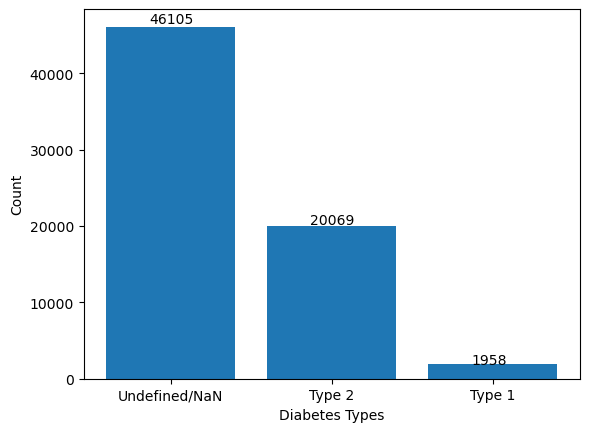

In [59]:
fig, ax = plt.subplots()
x_axis = ['Undefined/NaN', 'Type 2', 'Type 1']
ax.set_xlabel('Diabetes Types')
ax.set_ylabel('Count')

bar_container = ax.bar(x_axis, has_diab_type_count.values, width=0.8)

for each in bar_container:
    width = 0.8
    x_corr = each.get_x()
    height = each.get_height()

    ax.text(x_corr+width/3, height + height * 0.01, height)
    

The NaN values in the diabetes_type column are due to survey takers not being asked to classify their diabetes type, the lack of information is not due to randomness but due to a systematic data collection issue. 

In [70]:
dfy

,has_diabetes,BMI,age,total_household_income,smoking,high_bp,high_chol,heart_diseases,asthma,kidney_diseases,marital_status,education,general_health,physical_activity,arthritis,depression,sex,race
1,0,3,6,9,4,2,2,2,3,2,2,3,1,1,1,1,2,1
2,0,2,6,1,3,2,2,2,1,2,3,2,2,9,1,2,2,2
3,0,3,6,9,4,1,1,2,3,2,1,3,1,9,1,1,2,1
5,0,4,5,5,4,2,2,2,3,2,3,3,1,9,2,2,2,2
6,0,2,6,4,3,1,1,2,3,2,3,2,2,4,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433318,0,3,6,3,4,2,2,2,3,2,2,3,1,2,2,2,1,2
433319,0,2,2,4,4,1,1,2,3,2,5,4,1,4,2,2,2,2
433320,0,4,4,6,4,1,2,2,3,2,1,4,1,9,2,2,2,8
433321,1,2,6,2,4,2,2,2,3,2,5,4,1,9,2,2,2,2


## Summary Statistic of NaN group vs. Type-2 Group

In [60]:
key_columns = ['BMI', 'age', 'total_household_income', 
               'physical_activity', 'high_bp', 'high_chol', 'heart_diseases']

has_diab_df = dfy[dfy['has_diabetes'] == 1]

nan_dfy = has_diab_df[has_diab_df['diabetes_type'].isna()]

type2_dfy = has_diab_df[has_diab_df['diabetes_type'] == 2]


# Summary statistics for key columns
nan_summary = nan_dfy[key_columns].describe()

type2_summary = type2_dfy[key_columns].describe()

nan_summary

,BMI,age,total_household_income,physical_activity,high_bp,high_chol,heart_diseases
count,42051,46105,46105,46105,46105,43940,45276
mean,3,5,5,4,2,2,2
std,1,1,2,3,1,1,0
min,1,1,1,1,1,1,1
25%,3,5,3,1,1,1,2
50%,4,6,5,4,2,2,2
75%,4,6,6,4,2,2,2
max,4,6,9,9,9,9,2


In [61]:
type2_summary

,BMI,age,total_household_income,physical_activity,high_bp,high_chol,heart_diseases
count,18427,20069,20069,20069,20069,19302,19732
mean,3,5,5,4,2,2,2
std,1,1,2,3,1,1,0
min,1,1,1,1,1,1,1
25%,3,5,3,1,2,1,2
50%,4,6,5,4,2,2,2
75%,4,6,6,4,2,2,2
max,4,6,9,9,9,9,2


#### Key Comparison Points:

**Counts (Size of the Groups):**

NaN Group: Larger dataset (count ranges from ~42,000 to 46,000).

Type 2 Group: Smaller dataset (count ranges from ~18,000 to 20,000).

This difference in size suggests the NaN group is more diverse and potentially includes people from different diabetes profiles.
Central Tendencies (Mean, Median):

**Across variables (BMI, age, income,....), the mean and median are identical or nearly identical:**

BMI: Mean = 3, Median = 4 for both groups.

Age: Mean = 5, Median = 6 for both groups.

Household Income: Mean and median = 5 for both groups.

High BP and High Cholesterol: Mean and median = 2 for both groups.

These similarities suggest the NaN group might include many individuals with similar risk profiles to those classified as type 2.
Spread (Standard Deviation and Quartiles):

**The interquartile ranges (IQR) for both groups are nearly identical:**

BMI: [3, 4]

Age: [5, 6]

Income: [3, 6]

This further supports the hypothesis that the two groups are very similar in terms of risk factor distributions.


**Outliers (Max Values):**

Both groups exhibit the same maximum values for physical_activity, high_bp, and high_chol (max = 9). 

This consistency suggests that outliers or edge cases are uniformly distributed across groups.

Heart Diseases: Both groups have a maximum of 2, indicating a lack of variability in this variable.


### No Strong Differences

The two groups (NaN and type 2 diabetes) show very similar distributions across key variables (BMI, age, income, etc.). This similarity might indicate that the NaN group resembles the type 2 diabetes group in terms of risk factors.


### Currently not considering the NaN values and only looking for type 2 subset

In [62]:
values_to_drop = [np.nan, 1]
dfy.drop(dfy[dfy['diabetes_type'].isin(values_to_drop)].index, inplace=True)

In [63]:
dfy['diabetes_type'].value_counts(dropna=False)

diabetes_type
0    361959
2     20069
Name: count, dtype: int64

In [64]:
dfy['has_diabetes'].value_counts(dropna=False)

has_diabetes
0    361959
1     20069
Name: count, dtype: int64

### Dropping `diabetes_type` column as it now containt same values as in `has_diabetes` column

In [65]:
dfy.drop(columns=['diabetes_type'], inplace=True)

# Looking in remaining columns for NaNs

In [66]:
cols_nan_count = dfy.isna().sum()
cols_nan_count

has_diabetes                  0
BMI                       35759
age                           0
total_household_income        0
smoking                       0
high_bp                       0
high_chol                 49028
heart_diseases             3391
asthma                        0
kidney_diseases               0
marital_status                1
education                     0
general_health                0
physical_activity             0
arthritis                  1936
depression                    0
sex                           0
race                         77
dtype: int64

/var/folders/hn/pg9b1bkx793chm7mb0hjd4r80000gn/T/ipykernel_3513/722394684.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories_filtered, rotation=45)


[Text(0, 0, 'BMI'),
 Text(1, 0, 'high_chol'),
 Text(2, 0, 'heart_diseases'),
 Text(3, 0, 'marital_status'),
 Text(4, 0, 'arthritis'),
 Text(5, 0, 'race')]

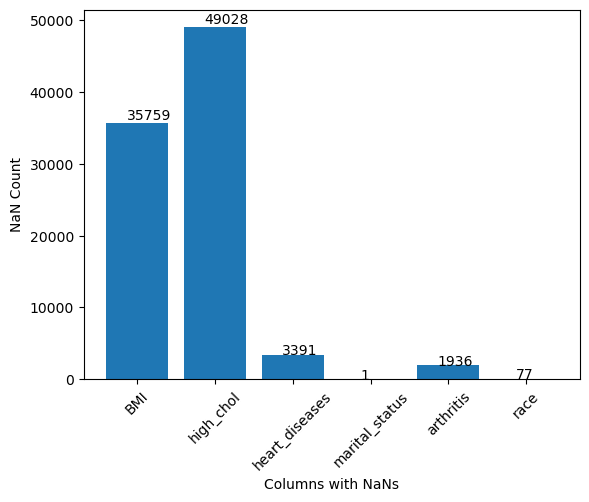

In [67]:
fig, ax = plt.subplots()

x_axis = cols_nan_count.index
y_axis = cols_nan_count.values

categories_filtered = [cat for cat, val in zip(x_axis, y_axis) if val != 0]
values_filtered = [val for val in y_axis if val != 0]

ax.set_xlabel('Columns with NaNs')
ax.set_ylabel('NaN Count')

bar_container = ax.bar(categories_filtered, values_filtered, width=0.8)

for each in bar_container:
    width = 0.8
    x_corr = each.get_x()
    height = each.get_height()

    ax.text(x_corr+width/3, height + height * 0.01, height)

ax.set_xticklabels(categories_filtered, rotation=45)

### Using KNNImputer to impute NaN Values

In [68]:
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5)

# df_imputed = imputer.fit_transform(dfy)


In [69]:
# df_imputed = pd.DataFrame(df_imputed, columns=dfy.columns)

# df_imputed.to_csv('./dataset/imputed_dataset.csv', index=False)

In [32]:
dfimputed = pd.read_csv('./dataset/imputed_dataset.csv')
dfimputed = dfimputed.drop(columns=['Unnamed: 0'])

In [33]:
dfimputed.isna().sum()

has_diabetes              0
BMI                       0
age                       0
total_household_income    0
smoking                   0
high_bp                   0
high_chol                 0
heart_diseases            0
asthma                    0
kidney_diseases           0
marital_status            0
education                 0
general_health            0
physical_activity         0
arthritis                 0
depression                0
sex                       0
race                      0
dtype: int64

### Dropping NaN as they were not MAR.

In [34]:
dfdropped = dfy.dropna()

#### Saving `dfdropped` as a csv file

In [35]:
# dfdropped.to_csv('./dataset/dropped_dataset.csv', index=False)

# 1. Looking at `dfdropped` Dataset

In [33]:
binary_data_count = dfdropped['has_diabetes'].value_counts(dropna=False)

NameError: name 'dfdropped' is not defined

<BarContainer object of 2 artists>

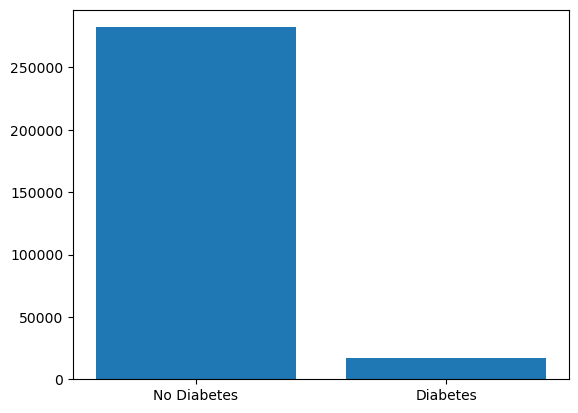

In [37]:
plt.bar(x=['No Diabetes', 'Diabetes'], height=binary_data_count.values)

Our dataset has imbalanced class distribution. 

For example, there are 282,165 individuals without diabetes `(0)` compared to only 17,417 with diabetes `(1)`. 

This imbalance can lead to a model that favors predicting the majority class `(0)` while underperforming on the minority class `(1).`

### Splitting in features and target variable

In [38]:
X = dfdropped[['BMI', 'age', 'total_household_income', 'smoking',
       'high_bp', 'high_chol', 'heart_diseases', 'asthma', 'kidney_diseases',
       'marital_status', 'education', 'general_health', 'physical_activity',
       'arthritis', 'depression', 'sex', 'race']]

In [39]:
y = dfdropped['has_diabetes']

# Resampling the Dataset

Applying Sampling only after train test split to prevent data leakage/contamination. 

In [40]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Oversampling the Minority Class

Using SMOTE (Synthetic Minority Oversampling Technique) to create synthetic samples.

In [41]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_ovs, y_train_ovs = smote.fit_resample(X_train, y_train)

In [42]:
y_train_ovs.value_counts()

has_diabetes
1    197600
0    197600
Name: count, dtype: int64

<BarContainer object of 2 artists>

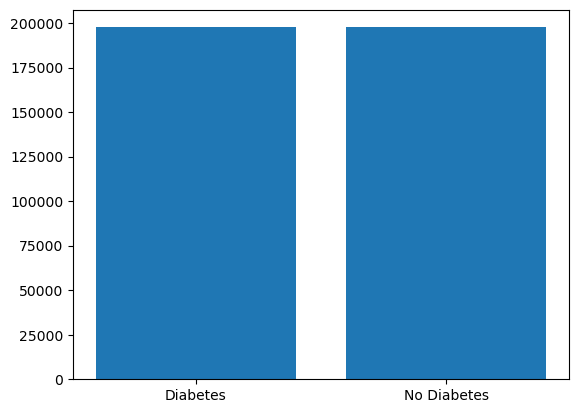

In [55]:
plt.bar(x=['Diabetes', 'No Diabetes'], height=y_train_ovs.value_counts().values)

## Making Prediction using RandomForest

In [44]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn import tree
import math

In [45]:
# Initializing the model
model_rf = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',
                             min_samples_split=10, class_weight='balanced' ,random_state=0)

# fitting the model on the train data
model_rf.fit(X_train_ovs, y_train_ovs)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_split=10, n_estimators=300, random_state=0)

In [46]:
# predicting values on test data
predictions = model_rf.predict(X_test)

In [47]:
# Creating a new dataframe with true and predicted values
rf_df = pd.DataFrame()
rf_df['Original Values'] = y_test
rf_df['Estimated Values'] = predictions


In [48]:
rf_df

,Original Values,Estimated Values
414013,0,1
299260,0,0
163492,0,0
166821,0,0
41591,0,0
...,...,...
9546,0,0
179587,0,0
288717,0,0
243179,0,0


In [49]:
# Evaluation

# calculating the accuracy of the model
model_accuracy = {}
accuracy_rf = accuracy_score(y_test, predictions)
model_accuracy['Random Forest Classifier'] = accuracy_rf

# calculating the classification report 
classificationreport = classification_report(y_test, predictions) 

# calculating the mse 
mse = mean_squared_error(y_test, predictions)

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of Random Forest Classifier : ' + str(round(accuracy_rf*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of Random Forest Classifier : 93.33

**************************************************

Classification_report : 
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     84565
         1.0       0.23      0.05      0.09      5310

    accuracy                           0.93     89875
   macro avg       0.59      0.52      0.53     89875
weighted avg       0.90      0.93      0.91     89875


**************************************************

Mean squared error : 0.06670375521557718

**************************************************

Root mean squared error : 0.25827070142696634


**Random Forest Classifier shows high overall accuracy (93.33%) and low root mean squared error (RMSE)**, 

but the classification report indicates significant class imbalance or poor performance on the minority class (label 1.0). 

Here's a breakdown:

##### Observations:

**Accuracy:**

A high accuracy score (93.33%) may be misleading due to the dominance of the majority class (label 0.0).

**Precision, Recall, F1-Score:**

For label 0.0 (majority class):

Excellent performance with a high precision (0.94), recall (0.99), and F1-score (0.97).

For label 1.0 (minority class):

Poor precision (0.23), recall (0.05), and F1-score (0.09), indicating the model struggles to correctly classify this class.

**Macro vs Weighted Averages:**

Macro average (treats all classes equally): Indicates poor performance across classes, driven by the poor handling of class 1.0.

Weighted average (accounts for class imbalance): Skewed positively due to the dominance of class 0.0.

**Mean Squared Error (MSE) and RMSE:**

Low error values confirm that predictions are generally close to the true labels but don't reflect the minority class's poor prediction quality.

### Using Logistic Regression

In [50]:
# Initializing the model
model_lr = LogisticRegression()

# fitting the model on the train data
model_lr.fit(X_train_ovs, y_train_ovs)

LogisticRegression()

In [51]:
# predicting values on test data
predictions = model_lr.predict(X_test)

In [52]:
# Creating a new dataframe with true and predicted values
lr_df = pd.DataFrame()
lr_df['Original values'] = y_test
lr_df['Estimated values'] = predictions
lr_df

,Original values,Estimated values
414013,0,1
299260,0,0
163492,0,0
166821,0,0
41591,0,0
...,...,...
9546,0,0
179587,0,0
288717,0,0
243179,0,1


In [53]:
accuracy_lr = accuracy_score(y_test, predictions)
model_accuracy['Logistic Regression Classifier'] = accuracy_lr

# calculating the classification report 
classificationreport = classification_report(y_test, predictions) 

# calculating the mse 
mse = mean_squared_error(y_test, predictions)

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of Logistic Regression Classifier : ' + str(round(accuracy_lr*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)
print('\nMean squared error : '+ str(mse))
print("\n"+"*"*50)
print('\nRoot mean squared error : '+ str(rmse))


Accuracy score of Logistic Regression Classifier : 71.29

**************************************************

Classification_report : 
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82     84565
         1.0       0.14      0.74      0.23      5310

    accuracy                           0.71     89875
   macro avg       0.56      0.73      0.53     89875
weighted avg       0.93      0.71      0.79     89875


**************************************************

Mean squared error : 0.28708762169680113

**************************************************

Root mean squared error : 0.5358055819948138


#### Observations:

**Accuracy:**

Logistic Regression achieves a lower overall accuracy (71.29%) compared to the Random Forest Classifier (93.33%).

The lower accuracy reflects a more balanced focus between the two classes, especially given the improved recall for the minority class (1.0).


##### Precision, Recall, F1-Score:**

**Label 0.0 (majority class):**
Precision (0.98) is excellent, but recall (0.71) is much lower compared to the Random Forest Classifier.
F1-score (0.82) is lower due to the recall drop.


**Label 1.0 (minority class):**
Precision (0.14) is poor but recall (0.74) is significantly better.
The F1-score (0.23) is still low, reflecting a trade-off between precision and recall.
Macro vs Weighted Averages:

**Macro average:**

Indicates better handling of the minority class compared to Random Forest but at the cost of majority class performance.

**Weighted average:**

Skewed toward label 0.0 due to its higher support but still indicates a drop in overall performance compared to Random Forest.

**Mean Squared Error (MSE) and RMSE:**

Higher MSE and RMSE compared to Random Forest, reflecting lower prediction quality overall.


#### Key Insights:

Logistic Regression is significantly better at identifying the minority class (1.0) with a recall of 0.74, suggesting it is less biased towards the majority class.
However, this comes at the expense of a higher false positive rate for the minority class (low precision of 0.14).

### Undersampling the Majority Class

Randomly remove samples from the majority class (0) to balance the dataset.

In [44]:
undersampler = RandomUnderSampler(random_state=42)
X_train_us, y_train_us = undersampler.fit_resample(X_train, y_train)

### Combination of Oversampling and Undersampling

Use Tomek to improve the balance by oversampling the minority and cleaning the majority.

In [46]:
# smote_tomek = SMOTETomek(random_state=42)
# X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train, y_train)